# COVID19 Detection Using X-Ray Images

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout,Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


In [2]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 34.01 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
import os 
main_dir = '/content/datasets/Data'

#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')

#directory with the training covid images
train_cov_dir = os.path.join(train_dir, 'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')
#directory with the testing covid images
test_cov_dir = os.path.join(test_dir, 'COVID19')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [4]:

train_covid_names = os.listdir(train_cov_dir)

print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)

print(train_normal_names[:10])

test_covid_names = os.listdir(test_cov_dir)

print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)

print(test_normal_names[:10])


['COVID-19 (7).jpg', 'COVID19(28).jpg', 'COVID-19 (15).jpeg', 'COVID19(495).jpg', 'COVID-19 (263).jpg', 'COVID19(91).jpg', 'COVID-19 (13).jpeg', 'COVID-19 (168).jpg', 'COVID19(297).jpg', 'COVID19(96).jpg']
['NORMAL(1452).jpg', 'NORMAL(1368).jpg', 'NORMAL(357).jpg', 'NORMAL(1294).jpg', 'NORMAL(278).jpg', 'NORMAL(1035).jpg', 'NORMAL(1445).jpg', 'NORMAL(244).jpg', 'NORMAL(229).jpg', 'NORMAL(1138).jpg']
['COVID19(408).jpg', 'COVID19(304).jpg', 'COVID19(207).jpg', 'COVID19(423).jpg', 'COVID19(478).jpg', 'COVID-19 (773).jpg', 'COVID19(337).jpg', 'COVID19(568).jpg', 'COVID19(521).jpg', 'COVID19(8).jpg']
['NORMAL(115).jpg', 'NORMAL(1301).jpg', 'NORMAL(61).jpg', 'NORMAL(1371).jpg', 'NORMAL(136).jpg', 'NORMAL(327).jpg', 'NORMAL(974).jpg', 'NORMAL(1245).jpg', 'NORMAL(1386).jpg', 'NORMAL(1510).jpg']


In [5]:

print('Total images in the training set:', len(train_covid_names + train_normal_names))

print('Total images in the training set:', len(test_covid_names + test_normal_names))

Total images in the training set: 1811
Total images in the training set: 484


['/content/datasets/Data/train/COVID19/COVID-19 (7).jpg', '/content/datasets/Data/train/COVID19/COVID19(28).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (15).jpeg', '/content/datasets/Data/train/COVID19/COVID19(495).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (263).jpg', '/content/datasets/Data/train/COVID19/COVID19(91).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (13).jpeg', '/content/datasets/Data/train/COVID19/COVID-19 (168).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1452).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1368).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(357).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1294).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(278).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1035).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1445).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(244).jpg']


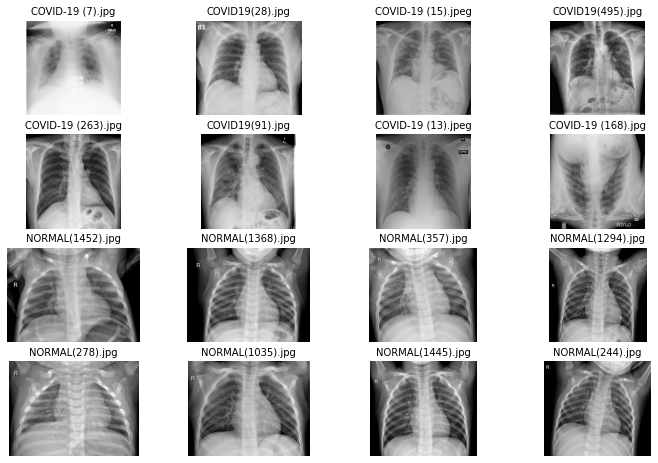

In [6]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)

from matplotlib import image as mpimg

#set the number of columns and rows
rows = 4
cols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,8)

#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_cov_dir,filename) for filename in train_covid_names[:8]]
normal_pic = [os.path.join(train_normal_dir,filename) for filename in train_normal_names[:8]]

#print the list
print(covid_pic)
print(normal_pic)

#merge the covid and normal list

merged_list = covid_pic + normal_pic

for i, img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows, cols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img, cmap='gray')

plt.show()

### Data Preprocessing & Augmentation

In [19]:
import re
# generate training,testing and validation batches 

dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,
                                zoom_range= 0.2,
                                horizontal_flip=True,
                                )
dgen_validation = ImageDataGenerator(rescale=1./255)

dgen_test = ImageDataGenerator(rescale=1./255)


train_generator = dgen_train.flow_from_directory(train_dir, target_size=(150,150),
                                                 subset='training',
                                                 batch_size=32,
                                                 class_mode='binary')

validation_generator = dgen_train.flow_from_directory(train_dir, target_size=(150,150),
                                                 subset='validation',
                                                 batch_size=32,
                                                 class_mode='binary')

test_generator = dgen_test.flow_from_directory(test_dir, target_size=(150,150),
                                                 batch_size=32,
                                                 class_mode='binary')



Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [20]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [21]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

### Build Convolutional Neural Network Model

In [22]:
model= Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32, (5,5), padding='SAME', activation='relu' ,input_shape= (150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64, (5,5), padding='SAME', activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 37, 37, 64)       

### Compile & Train the Model

In [23]:
#compile the model
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
#train the model
h= model.fit(train_generator, epochs = 5, validation_data= validation_generator)

Epoch 1/5
46/46 [==============================] - 55s 1s/step - loss: 0.1508 - accuracy: 0.9517 - val_loss: 0.1502 - val_accuracy: 0.9641
Epoch 2/5
46/46 [==============================] - 53s 1s/step - loss: 0.1358 - accuracy: 0.9551 - val_loss: 0.0959 - val_accuracy: 0.9669
Epoch 3/5
46/46 [==============================] - 53s 1s/step - loss: 0.1243 - accuracy: 0.9579 - val_loss: 0.1215 - val_accuracy: 0.9586
Epoch 4/5
46/46 [==============================] - 54s 1s/step - loss: 0.1310 - accuracy: 0.9524 - val_loss: 0.1130 - val_accuracy: 0.9613
Epoch 5/5
46/46 [==============================] - 54s 1s/step - loss: 0.1452 - accuracy: 0.9448 - val_loss: 0.1245 - val_accuracy: 0.9558


### Performance Evaluation

In [26]:
#get the keys of history object
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

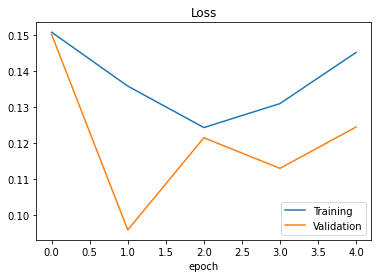

In [27]:
#plot graph between training and validation loss

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')
plt.title('Loss')
plt.show()

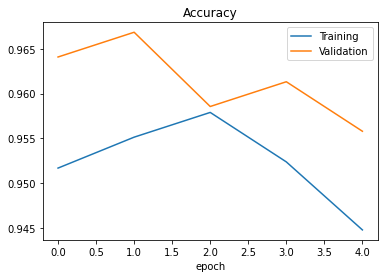

In [28]:
#plot graph between training and validation accuarcy

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')
plt.title('Accuracy')
plt.show()

In [29]:
# get the test acuarcy and loss
test_lost, test_accuracy = model.evaluate(test_generator)
print(test_lost, test_accuracy)

16/16 [==============================] - 18s 1s/step - loss: 0.1484 - accuracy: 0.9463
0.148426353931427 0.9462810158729553
